In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
from metrics import accuracy
from distance_metrics import euclidian_dist

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# K - Means Clustering

K-means clusters the training data around k most meaningful means. Each new sample is then assigned the cluster that has the nearest mean.
This is an unsupervised learning method meaning it does not require labels in order to learn meaningful patterns.

To do this:
1. Choose the number of clusters k. 
2. Select k random points from the data as centroids. 
3. Assign all the points to the cluster with the closest centroid by comparing the means.
4. Recompute the centroids based on the newly formed clusters.\
Repeat steps 3 and 4 until stopping criteria are reached.

Stopping criteria:
* Centroids of newly formed clusters do not change
* Points remain in the same cluster
* Maximum number of iterations is reached

In [72]:
X = [1,2,3,4,5,6,7,8,9,10,11]
np.random.choice(X, 2)
X

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [73]:
class KMeans:
    def __init__(self, k=5, n_iter=100):
        self.n_iter = n_iter
        self.k = k
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # chose k random points out of X as the centroids
        centroid_ids = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[id] for id in centroid_ids]
        # check for stopping criteria
        for _ in range(self.n_iter):
            # assign all points in x to the nearest centroid
            self.clusters = self._create_clusters(self.centroids)
            # Recompute the centroids of the clusters
            centroids_old = self.centroids
            self.centroids = self._get_new_centroids(self.clusters)
            # Check if the Centroids are converging by computing the distance between old and new centroids
            dist_old_new = [euclidian_dist(centroids_old[i], self.centroids[i]) for i in range(self.k)]
            is_converged = sum(dist_old_new) == 0
            if is_converged:
                return self._get_cluster_labels(self.clusters)
            
    def plot(self):
        # Currently only for 2 dimensional data
        for i, indices in enumerate(self.clusters):
            points = self.X[indices].T
            plt.scatter(*points)

        for centroid in self.centroids:
            plt.scatter(*centroid, color="black", linewidth=2)


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for id, sample in enumerate(self.X):
            centroid_id = self._closest_centroid(sample, centroids)
            clusters[centroid_id].append(id)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidian_dist(sample, centroid) for centroid in centroids]
        closest_centroid_id = np.argmin(distances)
        return closest_centroid_id
    
    def _get_new_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_id, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_id] = cluster_mean
        return centroids

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_id, cluster in enumerate(clusters):
            for sample_id in cluster:
                labels[sample_id] = cluster_id
        return labels


Actual number of clusters :4


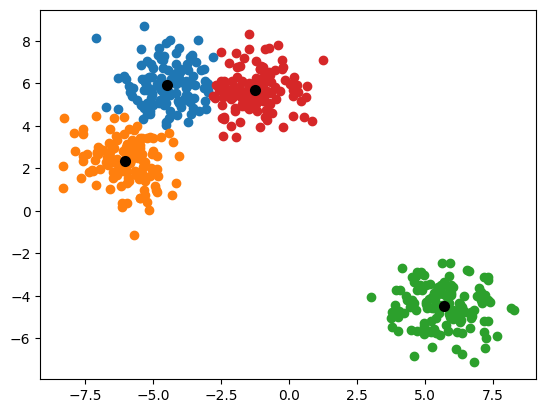

In [74]:
X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=1234)
print(f"Actual number of clusters :{len(np.unique(y))}")

kmeans_model = KMeans(k=4)
predicted = kmeans_model.predict(X)

kmeans_model.plot()